In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [273]:
#read datasets
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [274]:
#combine train and test dataset for implementing feature engineering
final_df = train_df.append(test_df)

In [275]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [276]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [277]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [278]:
#Feature Engineering 


final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

In [279]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [280]:
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [281]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [282]:
final_df.drop('Date_of_Journey' , axis = 1 , inplace = True)

In [283]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]

In [284]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [285]:
final_df['Arrival_Hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1]

In [286]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [287]:
final_df['Arrival_Hour'] = final_df['Arrival_Hour'].astype(int)
final_df['Arrival_min'] = final_df['Arrival_min'].astype(int)

In [288]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_Hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [289]:
final_df.drop('Arrival_Time' , axis=1, inplace = True)

In [290]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [291]:
final_df['Dep_hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min'] = final_df['Dep_Time'].str.split(':').str[1]
final_df['Dep_hour'] = final_df['Dep_hour'].astype(int)
final_df['Dep_min'] = final_df['Dep_min'].astype(int)
final_df.drop('Dep_Time' , axis=1, inplace = True)

In [292]:
final_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [293]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3, '4 stops':4,'nan':1})

In [294]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [295]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [296]:
final_df.drop('Route' , axis = 1 , inplace = True)

In [297]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [298]:
final_df['Duration_hour'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [299]:
final_df['Duration_min'] = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [300]:
final_df.drop(6474, axis = 0 , inplace =True )
final_df.drop(2660 , axis = 0 , inplace =True )

In [301]:
final_df['Duration_hour'] = final_df['Duration_hour'].astype('int')
final_df['Duration_hour'] = final_df['Duration_hour']*60

In [302]:
final_df['Duration_min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [303]:
final_df['Duration_min'].fillna(0,inplace = True)

In [304]:
final_df['Duration_min'] = final_df['Duration_min'].astype('int')

In [305]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45


In [306]:
final_df['Total_Duration'] = final_df['Duration_hour'] + final_df['Duration_min']

In [307]:
final_df.drop('Duration_min', axis = 1 , inplace = True)
final_df.drop('Duration_hour', axis = 1 , inplace = True)

In [308]:
final_df.drop('Duration', axis = 1 , inplace = True)

# as Year is not a selected features we would be dropping it from the train and test data set
final_df.drop('Year', axis = 1 , inplace = True)

In [309]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_min,Dep_hour,Dep_min,Total_Duration
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,21,35,16,50,285


## Exploratory Data Analysis


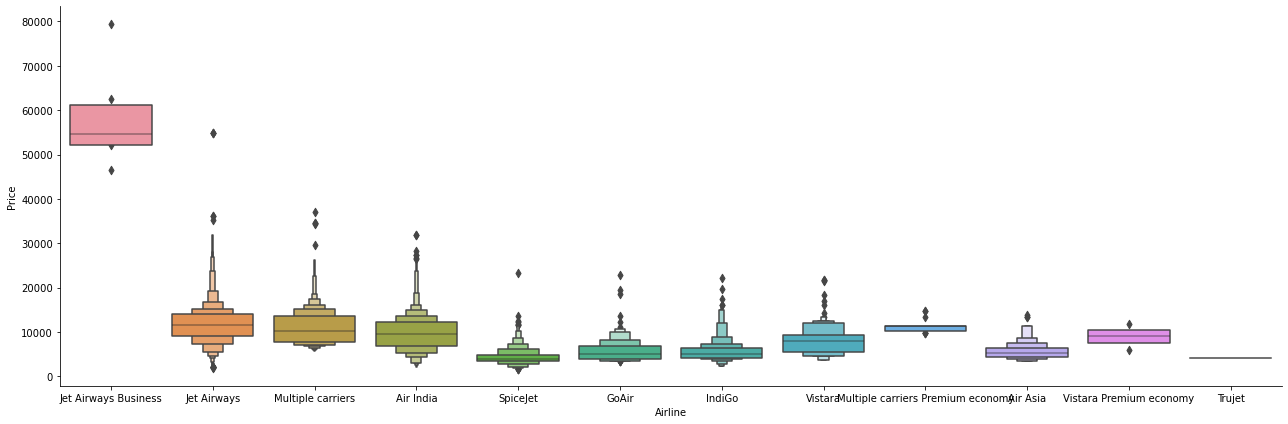

In [310]:
import seaborn as sns


#Airline Vs Price
sns.catplot(y = "Price" , x = "Airline" , data = final_df.sort_values("Price", ascending = False), kind = "boxen" , height = 6 , aspect = 3)
plt.show()

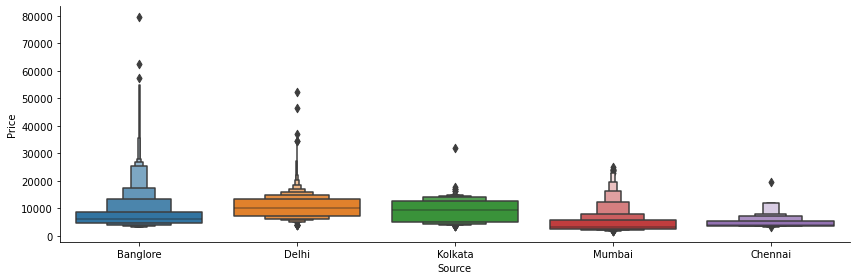

In [311]:
# Source Vs Price
sns.catplot(y = "Price", x = "Source", data = final_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

### Label encoding

In [312]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [313]:
from sklearn.preprocessing import LabelEncoder

Labelencoder = LabelEncoder()

In [314]:

final_df['Airline'] = Labelencoder.fit_transform(final_df['Airline'])
final_df['Source'] = Labelencoder.fit_transform(final_df['Source'])
final_df['Destination'] = Labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = Labelencoder.fit_transform(final_df['Additional_Info'])


In [315]:
final_df.shape

(13351, 13)

In [316]:
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrival_Hour,Arrival_min,Dep_hour,Dep_min,Total_Duration
0,3,0,5,0.0,8,3897.0,24,3,1,10,22,20,170
1,1,3,0,2.0,8,7662.0,1,5,13,15,5,50,445


In [317]:
final_df.drop(9039 , axis = 0 , inplace =True )

In [318]:
# Save the cleaned Dataset for future use
final_df.to_csv('FE_Flightdataset.csv')

### Feature Selection

In [319]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [320]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  int32  
 1   Source           13350 non-null  int32  
 2   Destination      13350 non-null  int32  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13350 non-null  int32  
 5   Price            10680 non-null  float64
 6   Date             13350 non-null  int32  
 7   Month            13350 non-null  int32  
 8   Arrival_Hour     13350 non-null  int32  
 9   Arrival_min      13350 non-null  int32  
 10  Dep_hour         13350 non-null  int32  
 11  Dep_min          13350 non-null  int32  
 12  Total_Duration   13350 non-null  int32  
dtypes: float64(2), int32(11)
memory usage: 886.5 KB


In [321]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2670
Date                  0
Month                 0
Arrival_Hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
Total_Duration        0
dtype: int64

In [339]:
df_train = final_df[:10680]
df_test = final_df[10680:]

In [340]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10680 non-null  int32  
 1   Source           10680 non-null  int32  
 2   Destination      10680 non-null  int32  
 3   Total_Stops      10680 non-null  float64
 4   Additional_Info  10680 non-null  int32  
 5   Price            10680 non-null  float64
 6   Date             10680 non-null  int32  
 7   Month            10680 non-null  int32  
 8   Arrival_Hour     10680 non-null  int32  
 9   Arrival_min      10680 non-null  int32  
 10  Dep_hour         10680 non-null  int32  
 11  Dep_min          10680 non-null  int32  
 12  Total_Duration   10680 non-null  int32  
dtypes: float64(2), int32(11)
memory usage: 709.2 KB


In [341]:
X = df_train.drop('Price', axis = 1)
y = df_train['Price']
y= y.dropna()

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [343]:
model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [344]:
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [345]:
selected_features = X_train.columns[(model.get_support())]

In [346]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Total_Duration'],
      dtype='object')

### Find correlation between Independent and Dependent Variables

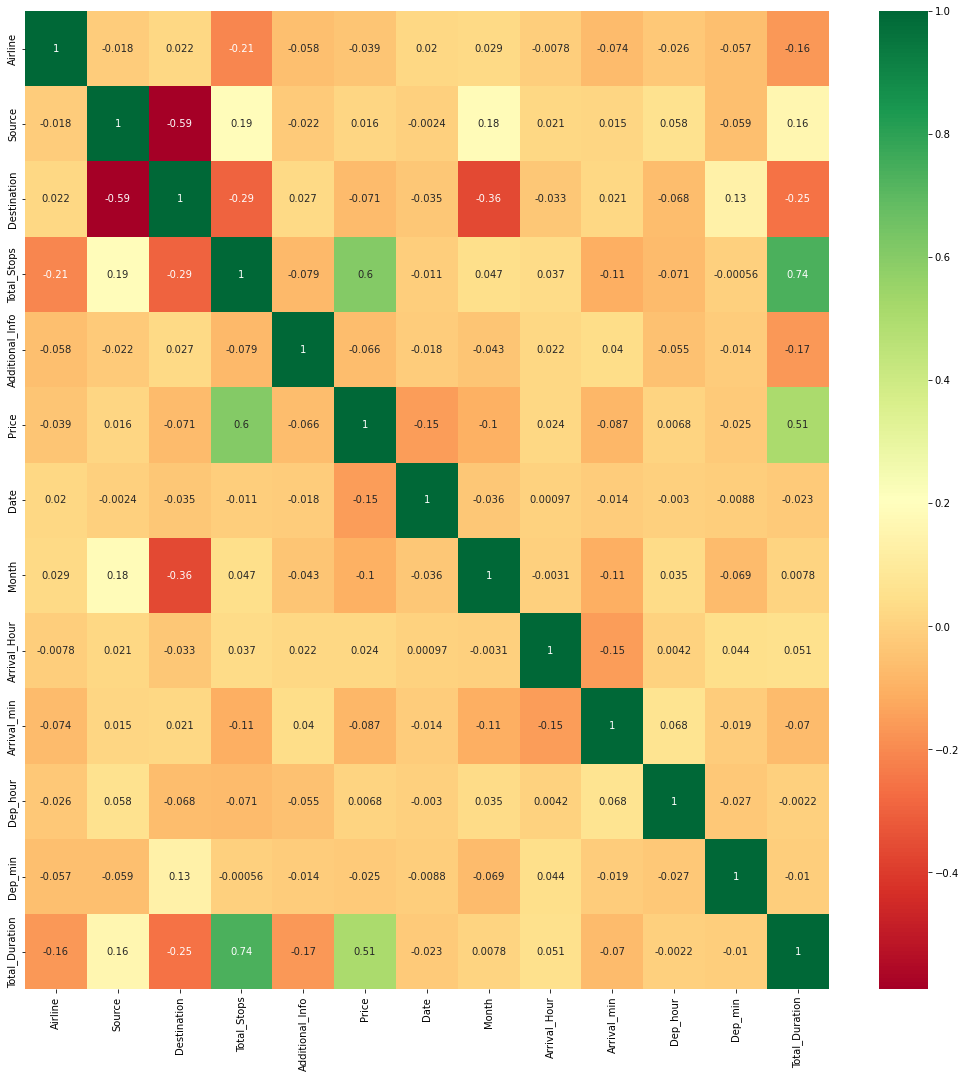

In [347]:
plt.figure(figsize = (18,18))
sns.heatmap(final_df.corr() , annot = True , cmap = "RdYlGn")
plt.show()

In [348]:
# Import feature using Extra Tree Regressor()
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)

[0.14895527 0.01899247 0.03866491 0.24993658 0.05856498 0.1324798
 0.04912497 0.03229056 0.02266055 0.02556577 0.02852667 0.19423749]


<AxesSubplot:>

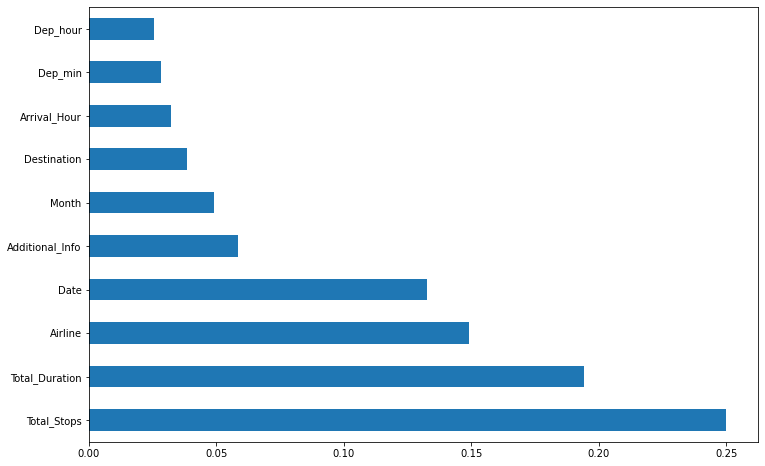

In [351]:
plt.figure(figsize = (12,8))
feature_importance = pd.Series(selection.feature_importances_, index = X.columns)
feature_importance.nlargest(10).plot(kind = 'barh')

In [352]:
## Random Forest Regression



In [353]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [354]:
y_pred = rf_reg.predict(X_test)
rf_reg.score(X_train,y_train)

0.9777247743578775

In [356]:
rf_reg.score(X_test,y_test)

0.8843450298801984

C:\Users\kruna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


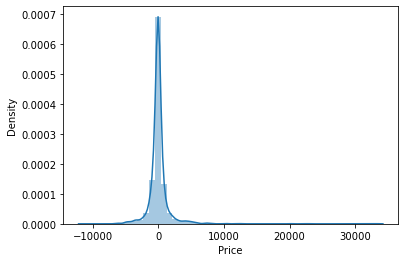

In [357]:
sns.distplot(y_test - y_pred)
plt.show()

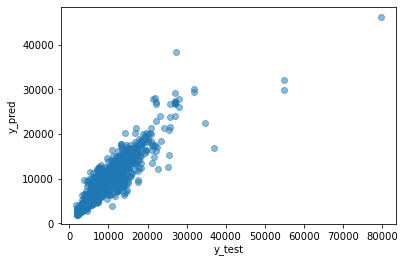

In [359]:
plt.scatter(y_test,y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [361]:
from sklearn import metrics
print('MSE' , metrics.mean_absolute_error(y_test, y_pred))
print('RSME' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 720.9176367078355
RSME 1609.3466754452472


In [362]:
#R2 score
metrics.r2_score(y_test, y_pred)

0.8843450298801984